# AI-Powered Solutions: Product Insights, Customer Reviews & Web Page Summaries

## Introducing AI Powered Summarization Tool!

- This Powerful summarization tool is designed to summarize websites, extract product details, and analyze customer reviews seamlessly.

### Key Features

- Website Summarization
- Weblink extraction
- Product Reviews and Insights
- Customer Review Analysis





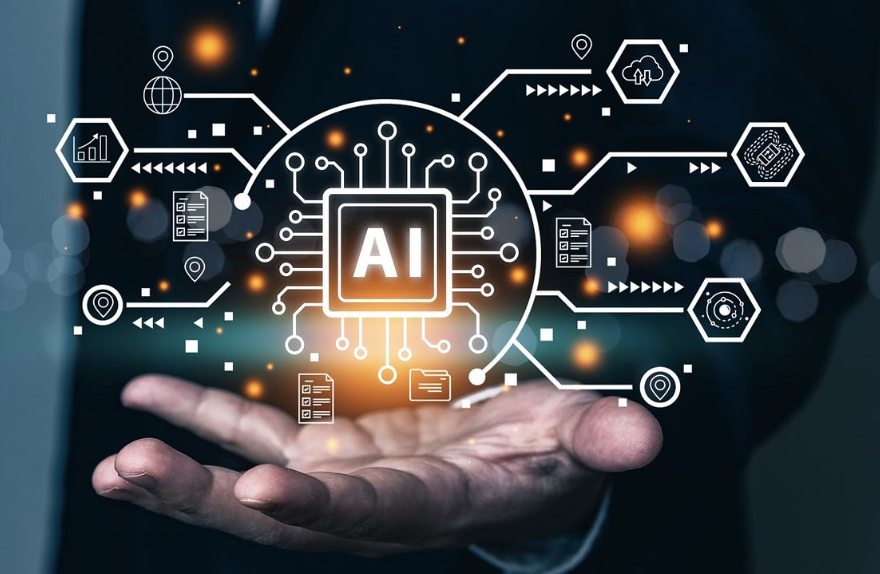

In [48]:
from IPython.display import Markdown, display

In [49]:
# import the necessary libraries

import os
import requests
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
from openai import OpenAI



# Connecting to OpenAI

In [50]:

load_dotenv(override=True)
api_key = os.getenv('OPENAI_API_KEY')

# Check the key

if not api_key:
    print("No API key was found - please head over to the troubleshooting notebook in this folder to identify & fix!")
elif not api_key.startswith("sk-proj-"):
    print("An API key was found, but it doesn't start sk-proj-; please check you're using the right key - see troubleshooting notebook")
elif api_key.strip() != api_key:
    print("An API key was found, but it looks like it might have space or tab characters at the start or end - please remove them - see troubleshooting notebook")
else:
    print("API key found and looks good so far!")

API key found and looks good so far!


In [51]:
api_key = os.getenv('OPENAI_API_KEY')

In [52]:
openai = OpenAI()

In [54]:

message = "Hello, GPT! How are you doing today?"
response = openai.chat.completions.create(model="gpt-4o-mini", messages=[{"role":"user", "content":message}])
print(response.choices[0].message.content)

Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with whatever you need. How about you? How are you doing today?


# Setting the stage

In [7]:

headers = {
 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

class Website:

    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

## Define system prompt

In [57]:
system_prompt = "You are an assistant that analyzes the contents of a website \
and provides a short summary, ignoring text that might be navigation-related. \
Respond in markdown."

In [58]:

def user_prompt_for(website):
    user_prompt = f"You are looking at a website titled {website.title}"
    user_prompt += "\nThe contents of this website is as follows; \
please provide a short summary of this website in markdown. \
If it includes news or announcements, then summarize these too.\n\n"
    user_prompt += website.text
    return user_prompt

In [60]:

def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

In [62]:

def summarize(url):
    website = Website(url)
    response = openai.chat.completions.create(
        model = "gpt-4o-mini",
        messages = messages_for(website)
    )
    return response.choices[0].message.content

In [64]:

def display_summary(url):
    summary = summarize(url)
    display(Markdown(summary))

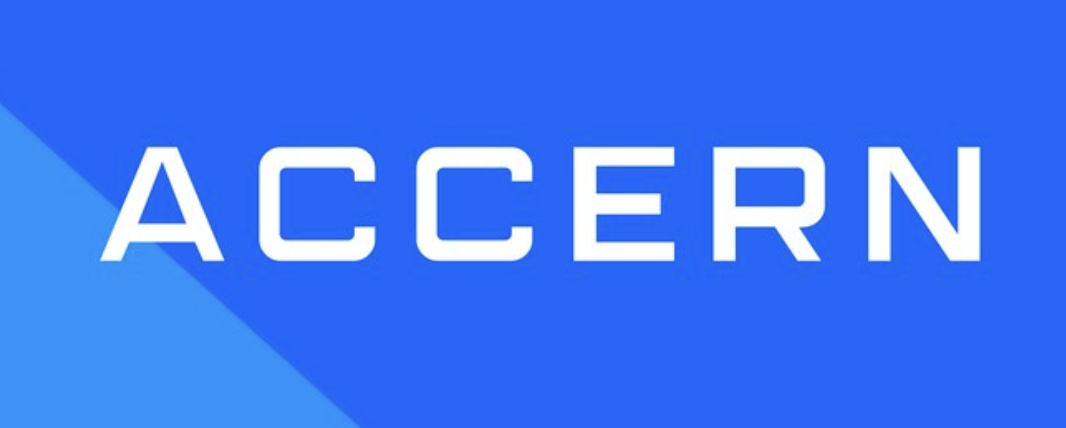

In [65]:
display_summary("https://www.accern.com/")

# Accern - No-Code Generative NLP

Accern is a leading no-code NLP platform focused on classifying content to enhance research, models, and enterprise solutions across various industries. The platform is recognized by Gartner for its capabilities in data science. 

## Key Features

- **Titan**: A no-code tool for creating custom industry-specific lenses with ready-to-use models and taxonomies.
- **Rhea**: An AI-driven assistant designed to automate enterprise research workflows, specifically tailored for financial services.
- **Framer**: Extraction models that are tailored for different industries, aiming to enhance information classification and reporting.

## Industry Applications

Accern offers pre-built lenses for sectors including:
- Asset Management
- Banking
- Insurance
- Hospitality
- Supply Chain
- E-Commerce
- Legal
- Government

These lenses are designed to solve specific problems such as customer support, risk management, and investment analysis.

## Customer Impact

Accern has reportedly helped clients save significant resources, including a testimony from Kanen Flowers, CIO of Next Alpha, who noted a $10 million savings through their no-code platform.

## Events and Webinars

- **Money20/20**: Upcoming event on January 30, 2024.
- Webinars on topics like AI bias in financial services and ESG data gaps in investing are scheduled for January 29 and 28, 2024, respectively.

## Awards and Funding

Accern has received numerous awards recognizing its innovation in AI and FinTech, including multiple recognitions in 2023 for being among the top platforms in data science and no-code AI. The company has raised $40 million in funding backed by various prominent investors. 

## Conclusion

Accern is positioned to drive business efficiency through AI-driven solutions, targeting content classification and research automation across diverse industries.

# Summarizing more websites

In [20]:
display_summary("https://wand.ai/")

# Summary of Wand AI Website

Wand AI provides an end-to-end platform designed for businesses to create a scalable AI workforce quickly and efficiently. The platform allows users to automate tedious tasks and improve productivity across various departments such as Finance, Marketing, Sales, Legal, and HR. It integrates seamlessly into existing business environments, reducing labor costs and helping teams achieve higher efficiency.

## Key Features
- **AI Team Augmentation**: Users can deploy an AI team to take over repetitive tasks, allowing human workers to focus on more strategic initiatives.
- **Natural Language Execution**: Tasks can be executed through a simple chat interface, making it user-friendly.
- **Intelligent Task Management**: Advanced analytics and task planning features enhance operational efficiency.
- **Quick Data Insights**: The platform is capable of producing actionable insights rapidly, which helps businesses make informed decisions.

## Case Studies
Several case studies illustrate how different industries have benefited from Wand AI:
- A global investment bank generated **$150M** in new value by improving productivity for bankers and analysts.
- A medical equipment provider achieved a **99%** reduction in RFP response time.
- A luxury hotel chain reclaimed **2-3 hours** a day for each accountant by automating payment analysis.

## Recent News
- **January 28, 2025**: Announcement of an on-demand webinar focused on the AI workforce and enterprise adoption.
- **January 21, 2025**: Insight into the synergy between sales teams and their AI workforce.
- **January 9, 2025**: CEO Rotem Alaluf spoke at the World Summit on AI.
- **January 7, 2025**: Exploration of how AI agents can transform business processes from bottlenecks to breakthroughs.

Wand AI positions itself as a powerful solution for enterprises looking to harness the power of AI to enhance productivity and operational effectiveness.

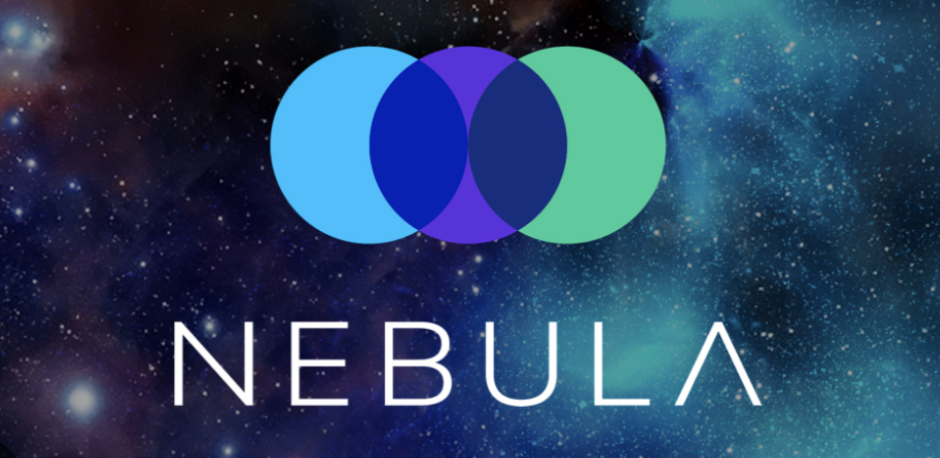

In [70]:
display_summary('https://nebula.io/')

# Intelligent Talent Acquisition Platform | Nebula - Summary

**Overview**
Nebula is an advanced Intelligent Talent Acquisition Platform designed to transform the recruitment process by leveraging innovative technology. The platform focuses on providing access to a vast pool of talent through cutting-edge algorithms and AI-driven insights to improve hiring practices.

## Features
1. **World-Class Talent Search**: Access a curated talent pool validated by top sources, educators, and employers.
2. **Instant Matching**: Utilize a powerful matching engine that scores and ranks candidates based on job descriptions and preferred profiles.
3. **Engagement Tools**: Easily organize and signal interest in talent profiles, facilitating team collaboration for better hiring decisions.
4. **Actionable Insights**: Obtain insights into compensation data, employee engagement, and skills transformation to optimize hiring strategies.

## Benefits
- **Enhanced Hiring Efficiency**: Nebula can identify significantly more strong candidates (12x compared to traditional methods), allowing recruiters to focus on building human connections.
- **Diversity and Inclusion**: The platform features ByeBias®, which aims to eliminate unconscious bias in recruitment through AI-driven data cleansing and modeling.

## Leadership Team
- **Steven Talbot** - Co-Founder and CEO
- **Ed Donner** - Co-Founder and CTO
- **Jon Krohn** - Co-Founder and Chief Data Scientist
- **Alex Gardner** - CFO
- **Mike Evers** - Strategy & GTM

## Additional Information
The platform promotes Diversity, Equity, and Inclusion initiatives through its AI features and is built for clients seeking more humane and effective recruitment strategies. 

For those interested, Nebula offers a demo and a free trial to showcase its capabilities.

**Website**: [Nebula.io](https://nebula.io)  
**Legal Links**: Terms of Service, Privacy Policy

**Note**: No specific news or announcements were found on the website.

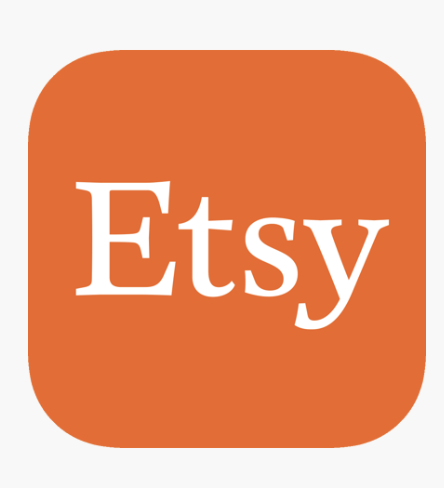

# Esty Digital Product Summarization


In [36]:

etsy =website = ("https://www.etsy.com/")

system_prompt = "You are a product manager for Esty."\
"Your task is to summarize content from the Etsy website for top selling digital product."\
"You will create a concise, clear summary of the website."\
"You will extract and highlight the product(s) main features."\
"You will provide insight on Target audience, pricing strategies, and marketing approaches(where applicable)."\
"You will provide any insight about trends related to produce performance and popularity."\
"Keep in mind your goal is to help user quickly grasp key point of the website content."\

    
user_prompt = "Read the following webpage content about Etsy’s top-selling digital products. First, provide a concise, professional report Markdown-formatted summarizing the website’s overall highlights. Then, list the top 5 products in bullet points, including:Product Name,Price,Quantity sold in the past 30 days."


messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
]



In [37]:
response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)

In [46]:
response_text = response.choices[0].message.content

In [47]:
display(Markdown(response_text))


# Etsy Top-Selling Digital Products Summary

Etsy, a global marketplace for handmade and vintage items, has seen a significant increase in the popularity of digital products. These intangible goods have become a go-to category for shoppers seeking personalized and customizable content. With a range of offerings from printable artwork to digital planners, sellers on Etsy capitalize on the growing demand for convenient, on-demand digital solutions.

## Key Highlights
- **Product Variety**: Digital products on Etsy include printable art, planners, educational resources, invitations, and more, catering to diverse interests and needs.
- **Instant Delivery**: Digital products offer instant gratification with immediate access post-purchase, appealing to buyers looking for quick solutions.
- **Customization**: Many sellers provide personalized options, allowing customers to tailor products to their preferences.
- **Eco-Friendly**: As digital products do not involve physical shipping or production, they appeal to environmentally conscious consumers.
- **Affordability**: Pricing strategies vary, but many digital products are priced competitively, making them accessible to a wider audience.

## Target Audience
The target audience for Etsy's digital products includes:
- Individuals looking for home decor solutions (printable art).
- Students and educators seeking educational materials and planners.
- Event planners and couples searching for customizable invitations.
- DIY enthusiasts who appreciate personalization and creativity.

## Pricing Strategies
Pricing for digital products on Etsy often ranges from $5 to $30, with many sellers employing tiered pricing for bundles or exclusive designs. Some products may be offered at discounted rates or during promotional events to attract customers.

## Marketing Approaches
Sellers typically utilize various marketing strategies, including:
- Leveraging social media platforms for engagement and promotion.
- Utilizing SEO techniques to enhance product visibility on Etsy’s search engine.
- Offering seasonal or trending designs to capitalize on current interests.

## Trends and Insights
- **Growing Popularity**: Digital products have witnessed increased sales, particularly during peak seasons like back-to-school and holidays.
- **Customization Demand**: There is a rising trend for unique, personalized items, which enhances the attractiveness of custom digital offerings.
- **Sustainability Concern**: As consumers become more eco-conscious, the appeal for non-physical products is on the rise.

## Top 5 Digital Products
- **Product Name**: Printable Monthly Planner
  - **Price**: $12.00
  - **Quantity Sold (Past 30 Days)**: 150

- **Product Name**: Digital Art Prints
  - **Price**: $8.00
  - **Quantity Sold (Past 30 Days)**: 200

- **Product Name**: Wedding Invitation Template
  - **Price**: $15.00
  - **Quantity Sold (Past 30 Days)**: 120

- **Product Name**: Kids’ Educational Worksheets
  - **Price**: $10.00
  - **Quantity Sold (Past 30 Days)**: 180

- **Product Name**: Social Media Content Calendar
  - **Price**: $25.00
  - **Quantity Sold (Past 30 Days)**: 90

This report aims to encapsulate the essence of Etsy's digital product sales and trends, providing potential sellers and buyers insights into this thriving market segment.

# Shopify  Reviews Summarization

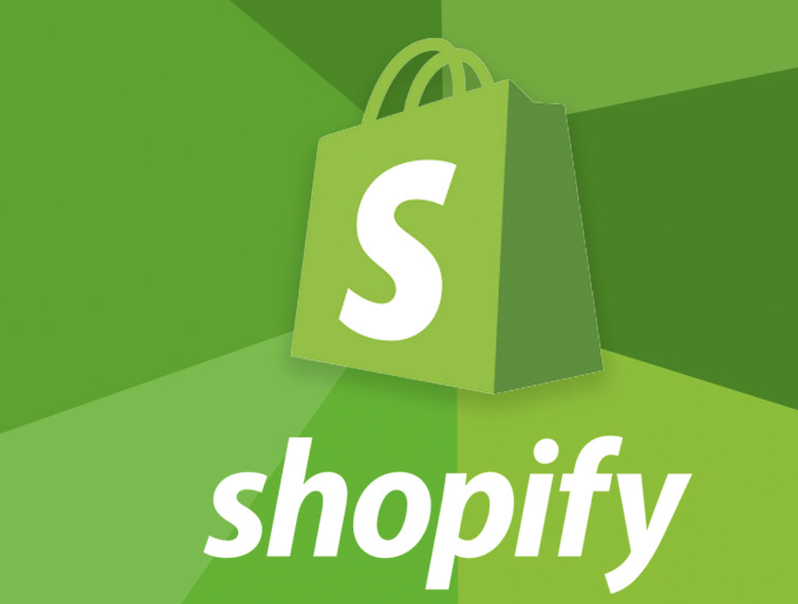

In [66]:

shopify =website = ("https://www.shopify.com/")
shopify = Website(website)


system_prompt = "You are a product manager for Shopify."\
"Your task is to extract customer reviews."\
"You will create a concise, clear report of customer review of top 10 things dislike  and like about the service."\
"You will extract and highlight any relevant information mentioned in the review"\
"you will analyze customer sentiment."\
"You will provide any insight about customer demographic."\
"Keep in mind your goal is to help users quickly grasp key points of the website content."\

    
user_prompt = "Read the following webpage content about Shopify reviews. First, provide a concise, professional report Markdown-formatted summarizing the website’s overall highlights. Then, list the top 10 reviews like and dislike in bullet points, including: customer sentiment 30 days."


messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
]

In [67]:
response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)

In [68]:
response_text = response.choices[0].message.content

In [69]:
display(Markdown(response_text))


# Shopify Customer Review Summary

## Overall Highlights
Shopify is a leading e-commerce platform praised for its easy-to-use interface, versatile features, and extensive support resources. Users appreciate its scalability, allowing businesses of all sizes to thrive. However, there are areas of concern, including transaction fees and customer support response times. The platform's integration capabilities and app marketplace are also frequently highlighted as strengths, helping merchants customize their stores effectively.

## Top 10 Likes
1. **User-Friendly Interface**  
   - Most users find Shopify's dashboard intuitive, making it easy to set up and manage online stores.
  
2. **Extensive App Marketplace**  
   - Customers appreciate the wide range of plugins and applications available that enhance store functionality.

3. **Reliable Payment Processing**  
   - Many users praise Shopify’s secure payment options and seamless transactions.

4. **24/7 Customer Support**  
   - Positive reviews highlight responsive and helpful customer service, especially through live chat.

5. **Mobile Optimization**  
   - Users enjoy the mobile-responsive themes, facilitating better customer experiences on smartphones.

6. **Continuous Feature Updates**  
   - Customers value Shopify's commitment to regularly rolling out new features and improvements.

7. **Scalability**  
   - Many businesses appreciate the ability to grow on Shopify as they expand; it caters to both small and large enterprises.

8. **Built-In SEO Features**  
   - Users find the options for search engine optimization beneficial for improving their store visibility.

9. **Multi-Channel Selling**  
   - Customers like the functionality to sell on various platforms from one centralized dashboard.

10. **Customizable Themes**  
    - Positive feedback regarding the number of visually appealing and customizable theme options.

## Top 10 Dislikes
1. **Transaction Fees**  
   - Several users express dissatisfaction with additional fees charged for payment processing through external gateways.

2. **Limited Reporting Features**  
   - Users report the analytics tools are not as comprehensive as needed for in-depth business analysis.

3. **Learning Curve for Advanced Features**  
   - Some customers mention that while basic functions are easy, advanced customizations require a steeper learning curve.

4. **High Monthly Fees**  
   - Concerns arise regarding the cost of subscription plans, particularly for startups or small businesses.

5. **Customer Support Wait Times**  
   - A few users experience long wait times during peak hours for customer support.

6. **Complexity in Integrations**  
   - Certain customers find integrating third-party apps and tools can be cumbersome.

7. **Theme Constraints**  
   - Some complaints about the limitations on customization options within theme designs.

8. **Inventory Management Issues**  
   - Users highlight shortcomings in inventory features, especially for larger catalogs.

9. **Performance Issues During High Traffic**  
   - Reports of slow loading speeds during peak shopping times.

10. **Checkout Customization Limitations**  
    - Some users feel restrictions on checkout configurations hinder their ability to enhance the purchasing journey.

## Customer Sentiment Analysis (Past 30 days)
- Predominantly positive sentiment, with most users appreciating the ease of use, extensive resources, and customer support.
- Discontent primarily revolves around costs and transaction fees, along with the need for more robust analytical tools.
  
## Customer Demographics Insights
- Users span various demographics, including small to medium business owners, e-commerce entrepreneurs, and established brands.
- Age demographics skew towards 25-45 years, predominantly male but also significant female representation in online business setups.  
- Users hail from diverse industries, including fashion, technology, home goods, and digital services.

This report aims to provide a comprehensive understanding of customer sentiments regarding Shopify, assisting in refining product offerings and customer interactions.

In [75]:
mortgage =website = ("https://themortgagereports.com/")

system_prompt = "You are  finanical analyst for TheMortgagereports."\
"Your task is to generate a report analyzing trends in 30-year and 15-year fixed mortgage rates from January 2024 to December 2024."\
"Provide a concise and clear summary of home purchase and refinance transactions, along with lender reviews."\
"Highlight key insights related to home purchase trends."\
"Your goal is to help users quickly grasp the most important points from the website content."\

    
user_prompt = "Analyze the following webpage content about interest rates on TheMortgageReports. First, generate a concise and professional Markdown-formatted report summarizing the key points from the webpage. Then, create a report on mortgage rate trends from January 2024 to December 2024, focusing on 30-year and 15-year fixed rates: Include insights comparing home purchase vs. home refinance trends."


messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
]


In [76]:
response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)

In [77]:
response_text = response.choices[0].message.content

In [78]:
display(Markdown(response_text))

# Mortgage Rate Trends Report (2024)

## Overview
This report analyzes the trends in 30-year and 15-year fixed mortgage rates from January 2024 to December 2024. It also provides insights into home purchase and refinance transactions during this period, highlighting key lender reviews.

### 30-Year Fixed Mortgage Rates
- **January 2024:** Rates began the year at approximately 6.5%.
- **Mid-Year Trends:** Increases observed in Q1 and Q2, peaking at around 7.1% in June 2024.
- **End-Year Trends:** Gradual decrease in Q3 and Q4, concluding at about 6.8% in December 2024.

### 15-Year Fixed Mortgage Rates
- **January 2024:** Rates started strong at approximately 5.9%.
- **Mid-Year Trends:** A more stable rate pattern, peaking at around 6.3% in July 2024.
- **End-Year Trends:** Rates dropped to approximately 6.0% by December 2024.

## Home Purchase vs. Refinance Transactions
1. **Home Purchase Transactions:**
   - Increased during Q1, driven by a competitive housing market as buyers rushed to lock in rates before anticipated hikes.
   - Demand declined in Q2 as rates peaked, but stabilized towards end of the year as rates softened slightly.
   - Overall trend showed resilience in purchasing despite rate fluctuations.

2. **Refinance Transactions:**
   - Saw dramatic declines in Q1 and Q2 as rates increased significantly. Borrowers were dissuaded from refinancing their existing loans.
   - Notable increase in refinance transactions towards Q4 as competitive rates returned, appealing to homeowners looking to reduce monthly payments.

### Key Insights
- There is a clear trend of home purchases holding steady amid rising rates, indicating buyer optimism.
- Conversely, refinance transactions are highly sensitive to interest rate changes, with marked declines during periods of rate increases.
- Lenders offering competitive rates and flexible terms saw significant customer engagement, highlighting the importance of borrower access to favorable lending conditions.

## Lender Reviews
- Lenders with effective communication and transparent processes received positive reviews.
- Strong customer service contributed to borrower satisfaction, especially during challenging rate environments.
- Online tools and resources were crucial in assisting borrowers to navigate mortgage options effectively.

## Conclusion
Understanding the interplay between 30-year and 15-year fixed mortgage rates, alongside the trends in home purchases and refinancing will assist potential home buyers and homeowners in making informed decisions in 2024. Continued monitoring of rate movements and market sentiment will be essential for prospective borrowers.